In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install xgboost

In [3]:
df = pd.read_csv("Bookings.csv")

In [4]:
df.head(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DMA        1
NAM        1
BFA        1
CYM        1
HND        1
Name: country, Length: 177, dtype: int64

#Replacing the NA values

In [9]:
df["agent"] = df["agent"].fillna(0)
df["children"] = df["children"].fillna(0)
df["country"] = df["country"].fillna("PRT")
df = df.drop("company",axis=1)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'July'),
  Text(1, 0, 'August'),
  Text(2, 0, 'September'),
  Text(3, 0, 'October'),
  Text(4, 0, 'November'),
  Text(5, 0, 'December'),
  Text(6, 0, 'January'),
  Text(7, 0, 'February'),
  Text(8, 0, 'March'),
  Text(9, 0, 'April'),
  Text(10, 0, 'May'),
  Text(11, 0, 'June')])

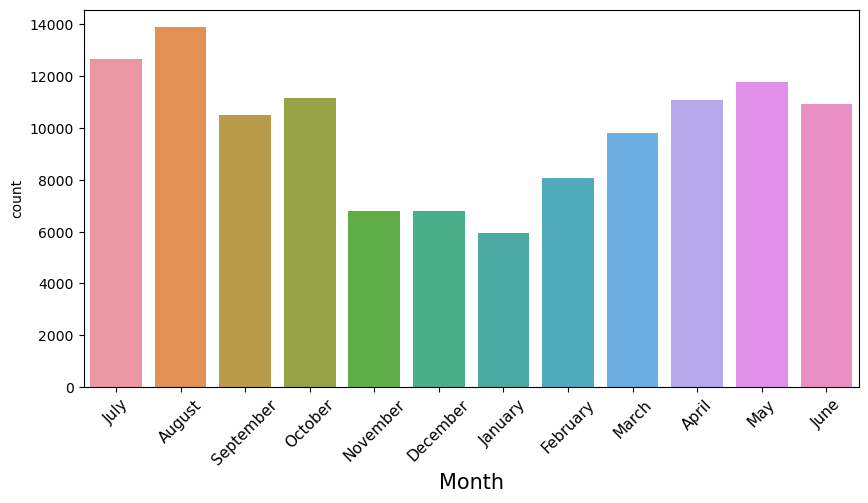

In [11]:
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=df, x = 'arrival_date_month')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11)

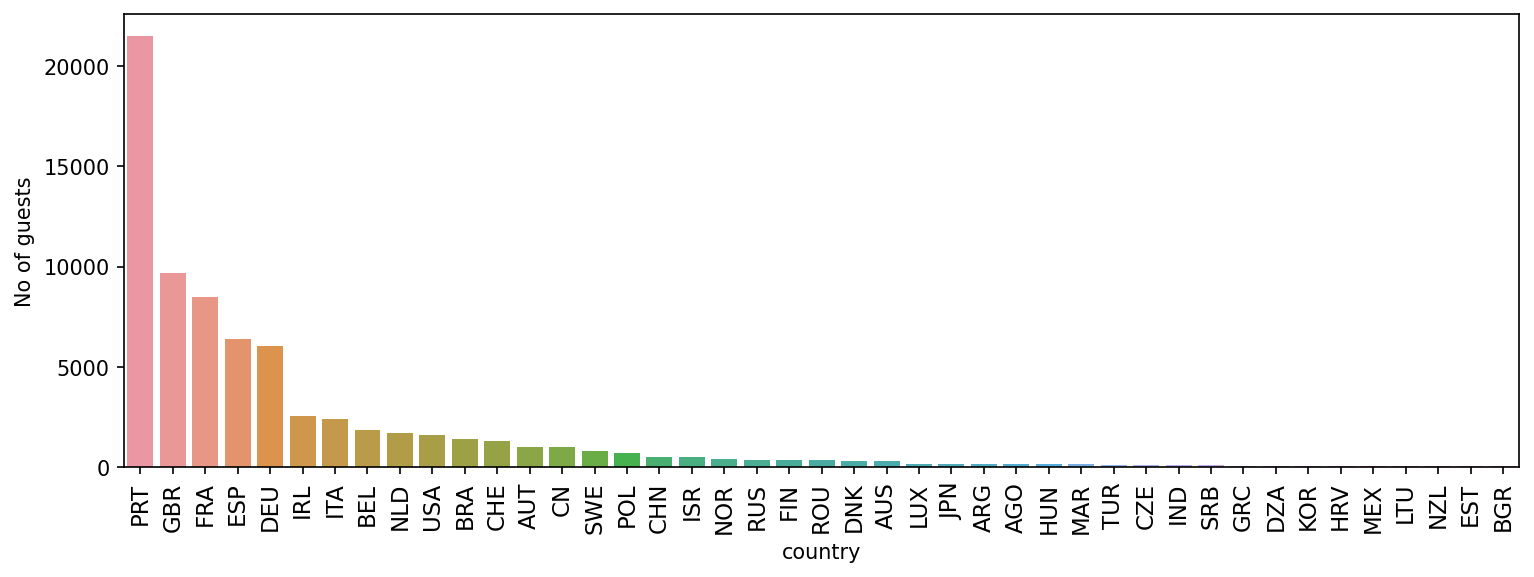

In [12]:
fig = plt.figure(figsize=(12,4), dpi=150)

country_wise_guests = df[(df['is_canceled'] == 0)]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']

country_wise_guests = country_wise_guests[country_wise_guests['No of guests'] > 60]

sns.barplot(data=country_wise_guests, x = 'country', y = 'No of guests')
plt.xticks(rotation=90,fontsize=11)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Online TA'),
  Text(3, 0, 'Offline TA/TO'),
  Text(4, 0, 'Complementary'),
  Text(5, 0, 'Groups'),
  Text(6, 0, 'Undefined'),
  Text(7, 0, 'Aviation')])

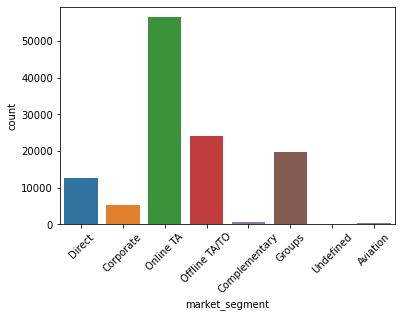

In [13]:
sns.countplot(data=df, x= 'market_segment')
plt.xticks(rotation=45,fontsize=10)

In [14]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

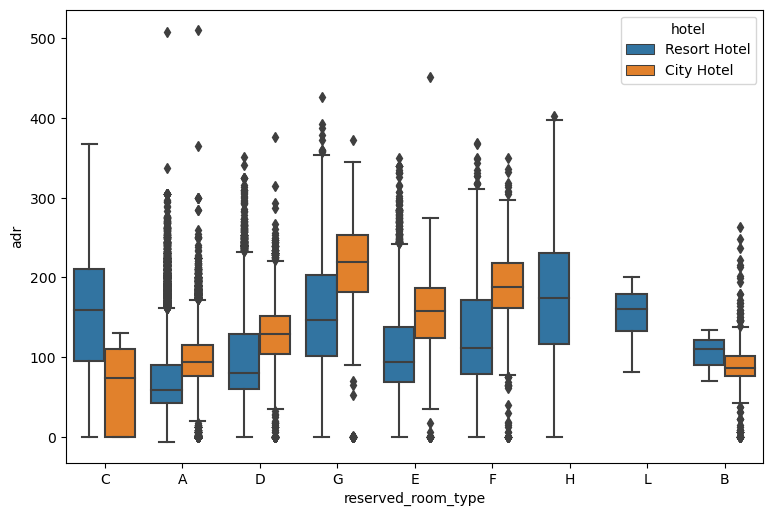

In [15]:
data = df[df['is_canceled'] == 0]
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data= data, x = 'reserved_room_type', y = 'adr', hue = 'hotel')

<AxesSubplot:xlabel='hotel', ylabel='count'>

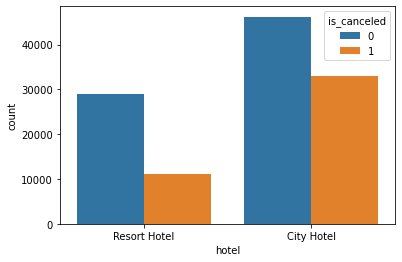

In [16]:
sns.countplot(data=df, x = 'hotel', hue='is_canceled')

In [17]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [18]:
df[['children', 'agent']] = df[['children', 'agent']].astype("int64")  

#Removing outliers

In [19]:
#lets create a different column to check for total staying nights 
df["total_staying_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df = df[df["total_staying_nights"]>=1]
df=df.reset_index(drop=True)

In [20]:
df = df[df["adr"]>0].copy()

In [21]:
pd.set_option('display.max_columns',None)

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_staying_nights
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2


#Creating and finalizing the features

In [23]:
df_sub = df.copy()

In [24]:
df_sub = df_sub.drop(['reservation_status'], axis=1)

## Create [Room] column 
## if assigned room is same 1, if not0
df_sub['Room'] = 0
df_sub.loc[ df_sub['reserved_room_type'] == df_sub['assigned_room_type'] , 'Room'] = 1

## Create [more_canceled] column
## if the cancellation rate is higher  1, if not 0
df_sub['more_canceled'] = 0
df_sub.loc[ df_sub['previous_cancellations'] > df_sub['previous_bookings_not_canceled'] , 'more_canceled'] = 1

In [25]:
## Seperate year/month/date from reservation_status_date column
df_sub['reservation_status_date'] = pd.to_datetime(df_sub['reservation_status_date'])

df_sub['reservation_year'] = df_sub['reservation_status_date'].dt.year
df_sub['reservation_month'] = df_sub['reservation_status_date'].dt.month
df_sub['reservation_day'] = df_sub['reservation_status_date'].dt.day

## remove the leftover columns. 
df_sub = df_sub.drop(['booking_changes','assigned_room_type','reservation_status_date','distribution_channel'],axis=1)

In [26]:
df_sub.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_staying_nights,Room,more_canceled,reservation_year,reservation_month,reservation_day
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,0,0,0,A,No Deposit,0,0,Transient,75.0,0,0,1,0,0,2015,7,2
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,0,0,0,A,No Deposit,304,0,Transient,75.0,0,0,1,1,0,2015,7,2
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,0,0,0,A,No Deposit,240,0,Transient,98.0,0,1,2,1,0,2015,7,3
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,0,0,0,A,No Deposit,240,0,Transient,98.0,0,1,2,1,0,2015,7,3
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,0,0,0,C,No Deposit,0,0,Transient,107.0,0,0,2,1,0,2015,7,3


In [27]:
df_sub.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
deposit_type                       object
agent                               int64
days_in_waiting_list                int64
customer_type                      object
adr                               

#Encoding the categorical variables

In [28]:
def transform(dataframe):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  cat_fea = list(dataframe.columns[dataframe.dtypes==object])
  dataframe[cat_fea] = dataframe[cat_fea].apply(lambda x: le.fit_transform(x))
  return dataframe

df_sub = transform(df_sub)

In [29]:
pd.set_option('display.max_columns',None)

In [30]:
df_sub.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_staying_nights,Room,more_canceled,reservation_year,reservation_month,reservation_day
0,1,0,7,2015,5,27,1,0,1,1,0,0,0,59,3,0,0,0,0,0,0,0,2,75.00,0,0,1,0,0,2015,7,2
1,1,0,13,2015,5,27,1,0,1,1,0,0,0,59,2,0,0,0,0,0,304,0,2,75.00,0,0,1,1,0,2015,7,2
2,1,0,14,2015,5,27,1,0,2,2,0,0,0,59,6,0,0,0,0,0,240,0,2,98.00,0,1,2,1,0,2015,7,3
3,1,0,14,2015,5,27,1,0,2,2,0,0,0,59,6,0,0,0,0,0,240,0,2,98.00,0,1,2,1,0,2015,7,3
4,1,0,0,2015,5,27,1,0,2,2,0,0,0,135,3,0,0,0,2,0,0,0,2,107.00,0,0,2,1,0,2015,7,3
5,1,0,9,2015,5,27,1,0,2,2,0,0,1,135,3,0,0,0,2,0,303,0,2,103.00,0,1,2,1,0,2015,7,3
6,1,1,85,2015,5,27,1,0,3,2,0,0,0,135,6,0,0,0,0,0,240,0,2,82.00,0,1,3,1,0,2015,5,6
7,1,1,75,2015,5,27,1,0,3,2,0,0,2,135,5,0,0,0,3,0,15,0,2,105.50,0,0,3,1,0,2015,4,22
8,1,1,23,2015,5,27,1,0,4,2,0,0,0,135,6,0,0,0,4,0,240,0,2,123.00,0,0,4,1,0,2015,6,23
9,1,0,35,2015,5,27,1,0,4,2,0,0,2,135,6,0,0,0,3,0,240,0,2,145.00,0,0,4,1,0,2015,7,5


#Normalizing

In [31]:
df_sub.var()

hotel                                 0.222716
is_canceled                           0.234348
lead_time                         11430.508914
arrival_date_year                     0.499289
arrival_date_month                   12.499659
arrival_date_week_number            184.281629
arrival_date_day_of_month            77.148962
stays_in_weekend_nights               0.989183
stays_in_week_nights                  3.572044
adults                                0.231569
children                              0.159791
babies                                0.009444
meal                                  1.138017
country                            1997.262014
market_segment                        1.520872
is_repeated_guest                     0.027086
previous_cancellations                0.720456
previous_bookings_not_canceled        2.091370
reserved_room_type                    2.864232
deposit_type                          0.113640
agent                             11500.539910
days_in_waiti

In [32]:
df_sub['lead_time']=np.log(df_sub['lead_time']+1)
df_sub['agent'] = np.log(df_sub['agent'] + 1)
df_sub['adr'] = np.log(df_sub['adr'] + 1)
df_sub['country'] = np.log(df_sub['country'] + 1)
df_sub['days_in_waiting_list'] = np.log(df_sub['days_in_waiting_list'] + 1)
df_sub['reservation_month'] = np.log(df_sub['reservation_month'] + 1)
df_sub['reservation_day'] = np.log(df_sub['reservation_day'] + 1)
df_sub['arrival_date_week_number'] = np.log(df_sub['arrival_date_week_number'] + 1)
df_sub['arrival_date_day_of_month'] = np.log(df_sub['arrival_date_day_of_month'] + 1)
df_sub['arrival_date_month'] = np.log(df_sub['arrival_date_month'] + 1)

df_sub = df_sub.drop([])

In [33]:
df_sub.var()

hotel                             0.222716
is_canceled                       0.234348
lead_time                         2.520964
arrival_date_year                 0.499289
arrival_date_month                0.575158
arrival_date_week_number          0.439545
arrival_date_day_of_month         0.506808
stays_in_weekend_nights           0.989183
stays_in_week_nights              3.572044
adults                            0.231569
children                          0.159791
babies                            0.009444
meal                              1.138017
country                           0.412919
market_segment                    1.520872
is_repeated_guest                 0.027086
previous_cancellations            0.720456
previous_bookings_not_canceled    2.091370
reserved_room_type                2.864232
deposit_type                      0.113640
agent                             3.496853
days_in_waiting_list              0.507638
customer_type                     0.334185
adr        

In [34]:
#df_sub.head(20)
pd.set_option('display.max_columns',None)

In [54]:
df_sub.head(50)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_staying_nights,Room,more_canceled,reservation_year,reservation_month,reservation_day
0,1,0,2.079442,2015,1.791759,3.332205,0.693147,0,1,1,0,0,0,4.094345,3,0,0,0,0,0,0.000000,0.0,2,4.330733,0,0,1,0,0,2015,2.079442,1.098612
1,1,0,2.639057,2015,1.791759,3.332205,0.693147,0,1,1,0,0,0,4.094345,2,0,0,0,0,0,5.720312,0.0,2,4.330733,0,0,1,1,0,2015,2.079442,1.098612
2,1,0,2.708050,2015,1.791759,3.332205,0.693147,0,2,2,0,0,0,4.094345,6,0,0,0,0,0,5.484797,0.0,2,4.595120,0,1,2,1,0,2015,2.079442,1.386294
3,1,0,2.708050,2015,1.791759,3.332205,0.693147,0,2,2,0,0,0,4.094345,6,0,0,0,0,0,5.484797,0.0,2,4.595120,0,1,2,1,0,2015,2.079442,1.386294
4,1,0,0.000000,2015,1.791759,3.332205,0.693147,0,2,2,0,0,0,4.912655,3,0,0,0,2,0,0.000000,0.0,2,4.682131,0,0,2,1,0,2015,2.079442,1.386294
5,1,0,2.302585,2015,1.791759,3.332205,0.693147,0,2,2,0,0,1,4.912655,3,0,0,0,2,0,5.717028,0.0,2,4.644391,0,1,2,1,0,2015,2.079442,1.386294
6,1,1,4.454347,2015,1.791759,3.332205,0.693147,0,3,2,0,0,0,4.912655,6,0,0,0,0,0,5.484797,0.0,2,4.418841,0,1,3,1,0,2015,1.791759,1.945910
7,1,1,4.330733,2015,1.791759,3.332205,0.693147,0,3,2,0,0,2,4.912655,5,0,0,0,3,0,2.772589,0.0,2,4.668145,0,0,3,1,0,2015,1.609438,3.135494
8,1,1,3.178054,2015,1.791759,3.332205,0.693147,0,4,2,0,0,0,4.912655,6,0,0,0,4,0,5.484797,0.0,2,4.820282,0,0,4,1,0,2015,1.945910,3.178054
9,1,0,3.583519,2015,1.791759,3.332205,0.693147,0,4,2,0,0,2,4.912655,6,0,0,0,3,0,5.484797,0.0,2,4.983607,0,0,4,1,0,2015,2.079442,1.791759


In [36]:
df_sub['customer_type'].unique()

array([2, 0, 3, 1])

#Model

In [37]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30,random_state=42)
    return x_train, x_test, y_train, y_test


x_train, x_test, y_train, y_test = data_split(df_sub, 'is_canceled')

from sklearn.impute import SimpleImputer

## default, imputing 'mean' value
imputer = SimpleImputer()
# make X_train for PDP
X_train = x_train
# feature list
feature_names = x_train.columns
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

#Model Training

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [39]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 500)
xgb.fit(x_train, y_train)

C:\Users\MONIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [42]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [43]:
rd_clf = RandomForestClassifier(n_estimators=300)
rd_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [44]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\MONIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
lr.score(x_test,y_test)

0.7969051675184554

In [46]:
xgb.score(x_test,y_test)

0.9990346394094265

In [47]:
rd_clf.score(x_test,y_test)

0.9562180579216354

In [48]:
dtc.score(x_test,y_test)

0.9440090857467348

In [49]:
gb.score(x_test,y_test)

0.9288188529244747

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

In [51]:
from pickle import dump
from pickle import load

In [52]:
# save the model to disk
dump(xgb, open('XGBintel.sav', 'wb'))

In [53]:
dump(xgb, open('XGBintel1.pkl', 'wb'))